<h1>TEXT MINING THE GREAT UNREAD</h1>

<h3>Data Visualization Using Python - Melvin Wevers</h3>

<b>Digital Humanities Group @ KNAW Humanities Cluster (Amsterdam)</b>
<br>
```melvinwevers (at) gmail.com```

<p>Data visualization to explore datasets and uncover patterns in data</p>
<p>In this workshop we will learn how to make different types of graphs using Python</p>

In [33]:
#libraries
import glob
import numpy as np
import pandas as pd

---

<h2>The Dataset</h2>
<p>For this workshop, we will be using the British newspaper Financial Times. Because of copyright restriction the dataset includes only the month september for the years 1939, 1966, and 1991.</p>


In [4]:
#this block downloads the json files in the data folder and places them in a Pandas dataframe
#this is tabular structure similar to an Excel spreadsheet. 
#You can do operations on the numbers and text in the dataframe.

path ='data' #use your path
allFiles = glob.glob(path + "/*.json")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    frame = pd.read_json(file_)
    list_.append(frame)
df = pd.concat(list_)

We have now loaded the documents into a dataframe 'df'.
<h3>Assignment 1: Explore the dataset</h3>

Use the following functions to explore the df
```
df.head()
df.tail()
df.shape[0]
```
Make a markdown cell and note the names of the columns that contain the text and the date of the articles.

<h3>Assignment 2: Investigate cells that contain specific word(s)</h3>

If you want to view cells that contain specific text (in this case Aarhus) you can use:
```
df[df["text_content"].str.contains("Aarhus")]
```
If you want to view the full contents of the cell use:
```
pd.set_option('display.max_colwidth', -1)
```
For truncation set the value -1 to the width of the column, for instance 50

In [17]:
df[df["text_content"].str.contains("Aarhus")]

,_id,article_dc_subject,article_dc_title,paper_dc_date,paper_dc_title,paper_dcterms_spatial,paper_dcterms_temporal,text_content
88,FTDA_1939_0901_0006_014,article,Berlin Again Buys Equities,1939-09-01,The Financial Times,National Daily,National Daily,"BERLIN, 31st August. Conditions on the Bourse ..."
28,FTDA_1939_0913_0002_012,article,Paris Firmer,1939-09-13,The Financial Times,National Daily,National Daily,"PAKIS, 12th Sept. The recent improvement noted..."


<h2>Working with dates / changes over time</h2>

If you want to work with dates there are two different approaches. I will explain both of them as 
they can come in handy when generated graphs that include time.


<h3>First approach: Setting the date column as an index</h3>

In [22]:
#this tells Pandas that the column includes dates
df['paper_dc_date'] = pd.to_datetime(df['paper_dc_date']) 
#this tells Pandas that the column includes dates. 
#The drop parameter tells Pandas to keep the original column with the dates
df = df.set_index(['paper_dc_date'], drop=False)
#Inspect the dataframe

<h3>Second Approach: turning elements of the dates in separate variables</h3>
This turns for instance the number of the month into a separate column, and the day of the week. 
the following creates a column 'day' with the numbers of the day in the month.
```
df['day'] = df['paper_dc_date'].dt.day 
```
<h3>Assignment 3: Making columns with date information</h3><br>
Make a column that contains the number of the week, month, and year.<br>
Which of these columns is redundant for our dataset? 

In [23]:
df['day'] = df['paper_dc_date'].dt.day
df['week'] = df['paper_dc_date'].dt.week
df['year'] = df['paper_dc_date'].dt.year

---

<h2>Generating Text Statistics</h2>

For this workshop, we will generate some basic descriptive statistics about the articles in the Financial Times.
We will use this information to generate the graphs in the remainder of this workshop. 

In [24]:
#calculate length of articles
df['article_length'] = df['text_content'].str.len()

#calculate number of words
def word_counter(row):
    tokens = row["text_content"].split(" ")
    return len(tokens)

df["number_of_words"] = df.apply(word_counter, axis=1)

#calculate mean length per day
df['mean_article_length'] = df['article_length'].groupby(pd.TimeGrouper('D')).aggregate(np.mean).dropna()
df['mean_number_of_words'] = df['number_of_words'].groupby(pd.TimeGrouper('D')).aggregate(np.mean).dropna()

In [27]:
#inspect dataframe
df.head(50)

,_id,article_dc_subject,article_dc_title,paper_dc_date,paper_dc_title,paper_dcterms_spatial,paper_dcterms_temporal,text_content,article_length,number_of_words,day,week,year,mean_article_length,mean_number_of_words
paper_dc_date,,,,,,,,,,,,,,,
1939-09-01,FTDA_1939_0901_0001_001,article,Fuller Horsey Sons & Cassell,1939-09-01,The Financial Times,National Daily,National Daily,-ESTABLISHED 1807- FULLER HORSEY . SONS & CASS...,180,29,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_002,article,Index and News Summary,1939-09-01,The Financial Times,National Daily,National Daily,ELL V MÂ·1 f.Z Pag American Markets Answers to...,4237,684,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_003,article,Gold Again Dearer,1939-09-01,The Financial Times,National Daily,National Daily,"Bank Rate 4 per cent., 24th August, 1939 Depos...",3227,534,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_004,article,The Financial Times,1939-09-01,The Financial Times,National Daily,National Daily,CITY EDITION LARGEST CIRCULATION OF ANY FINANC...,133,20,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_005,article,Rise in British Funds Severely Checked,1939-09-01,The Financial Times,National Daily,National Daily,Setember . October Contango...... M6n. 4 18 Mo...,1055,168,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_006,article,Gilt-Edged Fluctuate,1939-09-01,The Financial Times,National Daily,National Daily,Gilt-edged securities opened at prices moderat...,4365,726,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_007,article,China Coupon Due To-Day,1939-09-01,The Financial Times,National Daily,National Daily,All considerations of business were overridden...,4520,782,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_008,article,Quotations Lowered as Precaution,1939-09-01,The Financial Times,National Daily,National Daily,THURSDAY Evening. The Industrial market was in...,10127,1790,1,35,1939,3656.55,611.2
1939-09-01,FTDA_1939_0901_0001_009,article,"Blades, East & Blades, Limited",1939-09-01,The Financial Times,National Daily,National Daily,COMPANY PRINTING All Specimen Forms and inform...,331,51,1,35,1939,3656.55,611.2


---

<h2>VISUALIZING DESCRIPTIVE TEXT STATISTICS</h2>

For plotting we are going to be using Matplotlib and the Pandas extension build on this library.<br>
More about Matplotlib can be found here: https://matplotlib.org

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

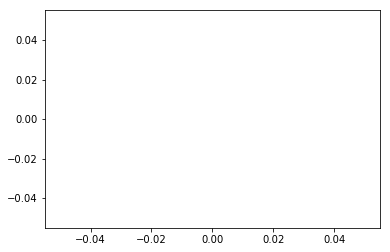

In [31]:
plt.plot()
#this shows the graph. In Jupyter this happens automatically after plt.plot, but it's good practice to include it
plt.show() 

This yields an empty plot. <br/>
We have only told python to show a plot, but we haven't provided it with what to plot and how to plot it

<h3>Line Graphs</h3>

```plt.plot(x_values, y_values)```<br>

Matplotlib will accept any iterable object, like NumPy arrays and pandas.Series instances.
<h3>Assignment 4</h3>
<ul>
<li>Generate a line graph for the year 1991 that shows the date on the x-axis and the length of the articles on the y-axis</li>
<li>Generate a line graph for the year 1991 that shows the date on the x-axis and the mean number of words in the articles on the y-axis</li>
</ul>

Tip:
<ul>
<li>Remember we set the date as the index. You can access the index using ```df.index```</li>
<li>You can select a year using ```df['1966']```</li>
<li>To select the index for a particular year you need to type ```df['1966'].index```</li>


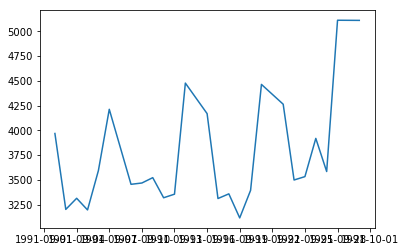

In [39]:
plt.plot(df['1991'].index, df['1991']['mean_article_length'])
plt.show()

The x-axis is not very readable. 
One way to fix this is to turn labels on the x-axis. 
We can do this with the xticks function. 

```matplotlib.pyplot.xticks()```

You can find how we can rotate the xticks here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks

<h3>Assignment 5</h3>
Generate a line graph that shows the date on the x-axis and the mean length of the articles on the y-axis.<br>
But also rotate the x-axis with 90 degrees.<br>
Also reflect on what the graph shows us.

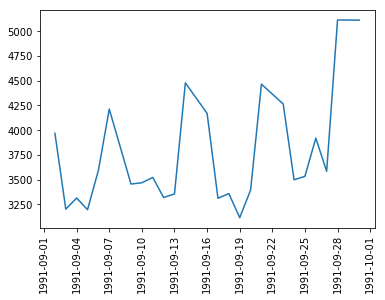

In [40]:
plt.plot(df['1991'].index, df['1991']['mean_article_length'])
plt.xticks(rotation=90)
plt.show()

<h3>Make the graph a little fancier</h3>

We still need to add labels to the x-axis and the y-axis, and we need to give a title to the graph. <br>
To set the x-axis label we can pass a string to the function: ```xlabel()```<br>
For the y-axis label, pass a string value to: ```ylabel()```<br>
To give the graph a title pass a string value to: ```title()```<br>

<b>Tip</b>: To call a function for matplotlib use ```plt.xlabel()```

<h3>Assignment 6</h3>
Generate a line graph for 1991 that plots the mean length of the articles. <br>
Rotate the labels and the graph a title and label the x-axis and y-axis.

<b>Tip</b>: You can copy part of your earlier code

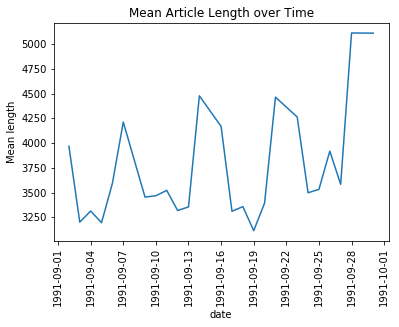

In [56]:
plt.plot(df['1991'].index, df['1991']['mean_article_length'])
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("Mean length")
plt.title("Mean Article Length over Time")
plt.show()

<h2>The Elements of the Graph</h2>

There are two central elements, the <b>Figure</b> object and the <b>Axes</b> object.


Figure object is top-levelcontainer and contains the entire Figure.<br>
One Figure could for institute include multiple graphs. 
```
fig = plt.figure()
```
Axes object contains the information that is used to plot the graph as a Figure.<br> 
Axes object contains the values, ticks on the x-axis and y-axis and visual symbols such as markers, lines, and gridlines. <br>
A figure can contain multiple Axes objects (graphs)

You can create an Axes object using:<br>
```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```

If you wanted to plot two graphs next to each other. You would use:
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```

<h3>Assignment 7: Making Axes and Figures</h3>

Create an empty figure that contains four plots with 2 rows and 2 columns. <br>
First make the Figure object, and then four Axes objects. 

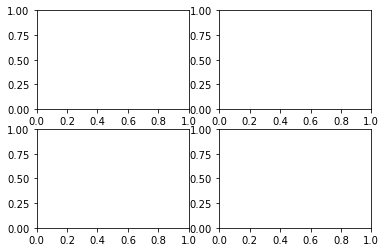

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.show()


The graphs could use a little padding between them.  
To increase the padding between them you can add to the previous block.<br>
Add this and play around with the values.
```
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

```


<h3>Assignment 8: Making Graphs with Real Data</h3>

Make a figure that contains two subplots underneath each other. <br>
Show a line graph with the mean number of words in 1966 and another one for 1991. 

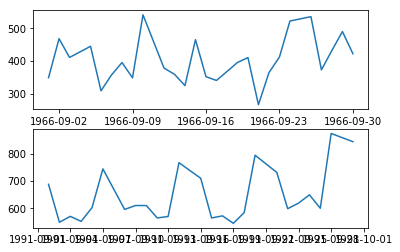

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(df['1966'].index, df['1966']['mean_number_of_words'])
ax2.plot(df['1991'].index, df['1991']['mean_number_of_words'])

plt.show()

As you can see the second graph does not fit. You can increase the size of the entire figure using 
```
fig = plt.figure(figsize=(width, height))
```
Adjust the previous block and set a width and height that works for you. 

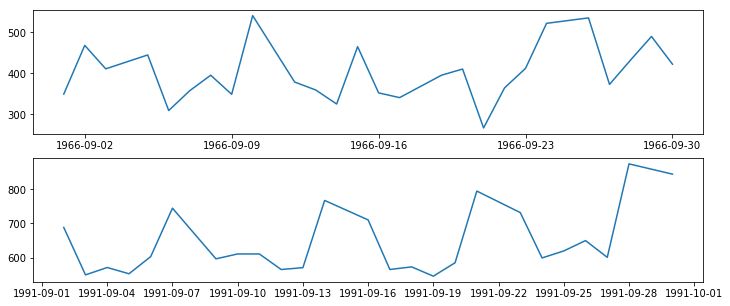

In [65]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(df['1966'].index, df['1966']['mean_number_of_words'])
ax2.plot(df['1991'].index, df['1991']['mean_number_of_words'])

plt.show()

<h3>Multiple linegraphs in one figure</h3>

Of course you also plot multiple line graphs into one figure. Python automatically assigns colors to the different line graphs. If you don't like these colors you can add the parameter.
```
c = {name of colour}
``` 

You can also add labels to the lines with the parameter 
```
label = {name of label}
```
If you want to add a legend you add the line
```
plt.legend(loc='upperleft') #feel free to change this location
```

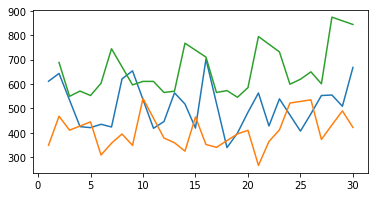

In [69]:
fig = plt.figure(figsize=(6,3))

plt.plot(df['1939']['day'], df['1939']['mean_number_of_words'])
plt.plot(df['1966']['day'], df['1966']['mean_number_of_words'])
plt.plot(df['1991']['day'], df['1991']['mean_number_of_words'])
plt.show()

In [ ]:
You ca

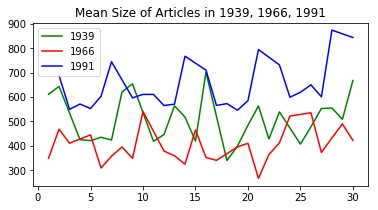

In [71]:
#to be able to compare the months on a variable. Made a list with the day. 
df['day'] = df['paper_dc_date'].dt.day
fig = plt.figure(figsize=(6,3))
plt.title("Mean Size of Articles in 1939, 1966, 1991")

plt.plot(df['1939']['day'], df['1939']['mean_number_of_words'], c='green', label='1939')
plt.plot(df['1966']['day'], df['1966']['mean_number_of_words'], c='red', label='1966')
plt.plot(df['1991']['day'], df['1991']['mean_number_of_words'], c='blue', label='1991')
plt.legend(loc='upper left')
plt.show()
#I could do the assignment of colors and labels with a for loop, but this is clearer I think


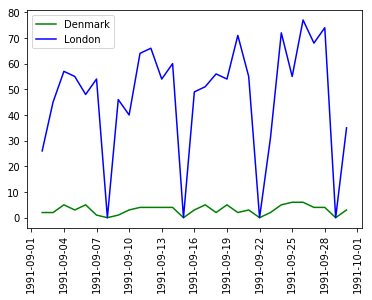

In [18]:
plt.plot(df['1991']['text_content'][df['1991']['text_content'].str.contains("Denmark", regex=True)].groupby(pd.TimeGrouper('D')).count(), c='green',label='Denmark')
plt.plot(df['1991']['text_content'][df['1991']['text_content'].str.contains("London", regex=True)].groupby(pd.TimeGrouper('D')).count(), c='blue',label='London')
plt.legend(loc='upper left')
plt.xticks(rotation='90')
plt.show()

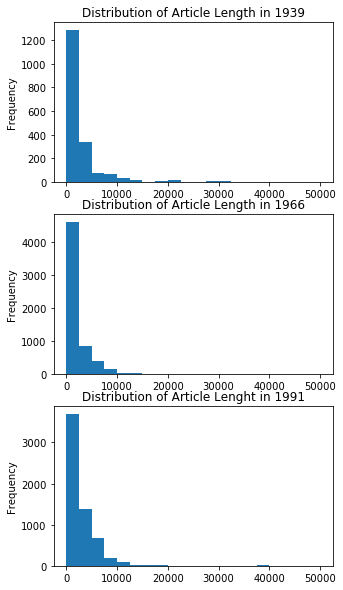

In [45]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.hist(df['1939']['article_length'], 20, range=(0,50000))
ax1.set_title("Distribution of Article Length in 1939")
#ax1.set_ylim(0,50)
ax1.set_ylabel("Frequency")

ax2.hist(df['1966']['article_length'], 20, range=(0,50000))
ax2.set_title("Distribution of Article Length in 1966")
#ax2.set_ylim(0,50)
ax2.set_ylabel("Frequency")

ax3.hist(df['1991']['article_length'], 20, range=(0,50000))
ax3.set_title("Distribution of Article Lenght in 1991")
#ax3.set_ylim(0,50)
ax3.set_ylabel("Frequency")

plt.show()

<h3>Boxplot</h3>
Contains one forth of the values. Median is middle line. 
The whiskers in relation to the box shows us how spread out the set is. 


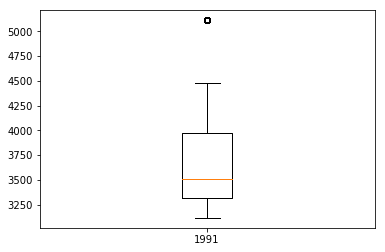

In [49]:
fig,ax = plt.subplots()
ax.boxplot(df['1991']['mean_size'])
#ax.set_ylim(0,5000)
ax.set_xticklabels(["1991"])

plt.show()

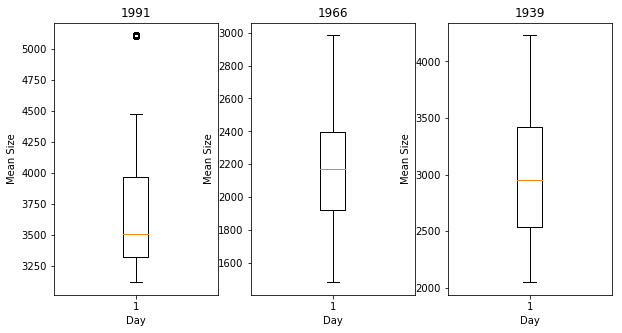

In [62]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.boxplot(df['1991']['mean_size'])
ax1.set_title('1991')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Size')
ax2.boxplot(df['1966']['mean_size'])
ax2.set_title('1966')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean Size')
ax3.boxplot(df['1939']['mean_size'])
ax3.set_title('1939')
ax3.set_xlabel('Day')
ax3.set_ylabel('Mean Size')
plt.show()

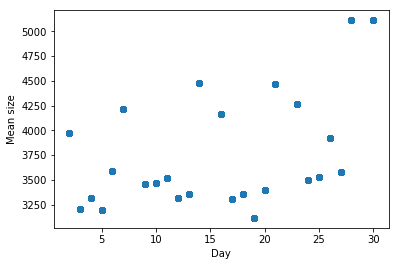

In [50]:
fig, ax = plt.subplots()
ax.scatter(df['1991']['day'], df['1991']['mean_size'])
ax.set_xlabel('Day')
ax.set_ylabel('Mean size')
plt.show()

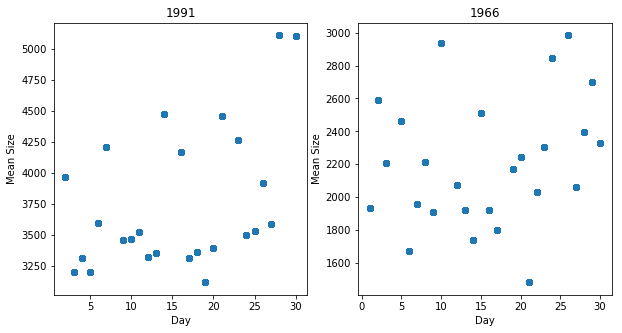

In [20]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(df['1991']['day'], df['1991']['mean_size'])
ax1.set_title('1991')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Size')
ax2.scatter(df['1966']['day'], df['1966']['mean_size'])
ax2.set_title('1966')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean Size')
plt.show()

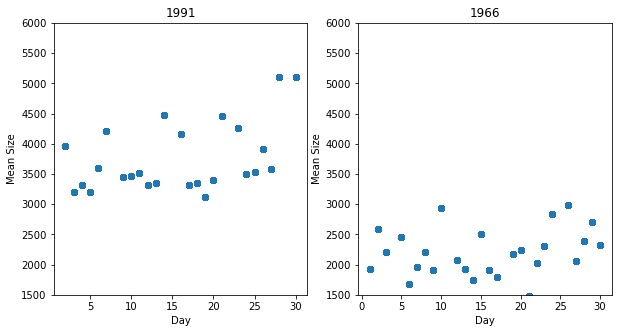

In [21]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(df['1991']['day'], df['1991']['mean_size'])
ax1.set_title('1991')
ax1.set_xlabel('Day')
ax1.set_ylabel('Mean Size')
ax1.set_ylim(1500,6000)
ax2.scatter(df['1966']['day'], df['1966']['mean_size'])
ax2.set_title('1966')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean Size')
ax2.set_ylim(1500,6000)
plt.show()

Frequency distribution
How many articles per day



In [64]:
frequency_counts = df['paper_dc_date'].value_counts().sort_index()

In [68]:
total_1939 = df['1939']['text_content'].count()
total_1966 = df['1966']['text_content'].count()
total_1991 = df['1991']['text_content'].count()


AttributeError: 'Series' object has no attribute 'values_counts'

1874

<H2>Plotting with Pandas</h2>
Plotting with Pandas relies on Matplotlib. It's done via the function
```
dataframe.plot()
```
We can pass the x and y-value, the kind of plot, the title and the figsize in one line. 
For instance: 
```
df['1991'].plot(x='day', y='mean_size', kind='scatter', title='Mean size per day', figsize=(5,10))
```
More on this see: http://pandas.pydata.org/pandas-docs/version/0.19.0/generated/pandas.DataFrame.plot.html

Try to plot a green line graph for 1966 with the 'day' as the x-axis, mean-size as the y-axis and give the line the label '1966'


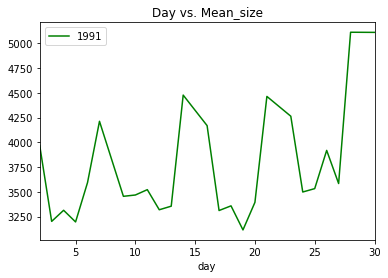

In [24]:
df['1991'].plot(x='day', y='mean_size', kind='line', title='Day vs. Mean_size', label="1991", color='green')

If you output the pandas plot to a variable, you can override this graph using the matplotlib functions you learned. 
Try to change the limit of the y-axis, and the title of the graph.  

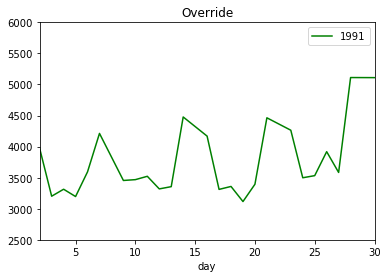

In [25]:
ax = df['1991'].plot(x='day', y='mean_size', kind='line', title='Day vs. Mean_size', label="1991", color='green')
ax.set_ylim(2500,6000)
ax.set_title("Override")


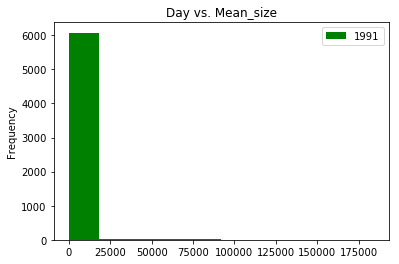

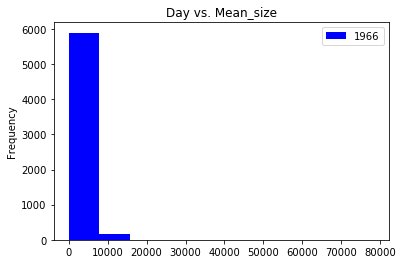

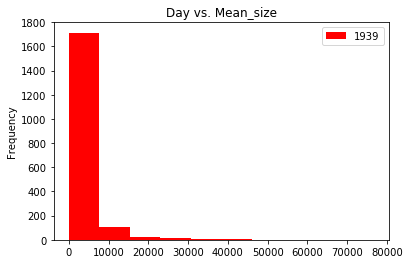

In [34]:
df['1991'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1991", color='green')
df['1966'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1966", color='blue')
df['1939'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1939", color='red')

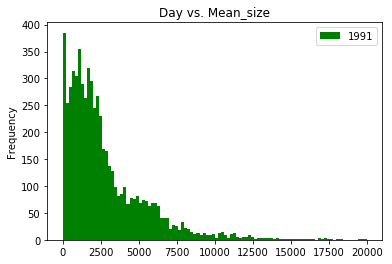

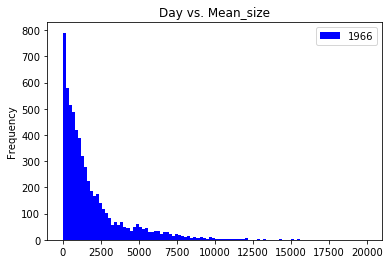

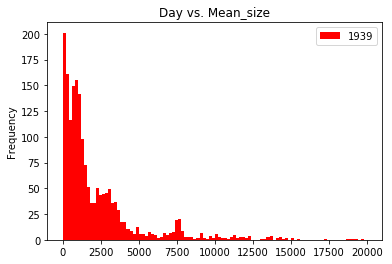

In [33]:
df['1991'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1991", color='green', bins=100, range=(0,20000))
df['1966'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1966", color='blue', bins=100, range=(0,20000))
df['1939'].plot(x='day', y='article_length', kind='hist', title='Day vs. Mean_size', label="1939", color='red', bins=100, range=(0,20000))
#standard determination of number of bins, you can override this by adding bins=x

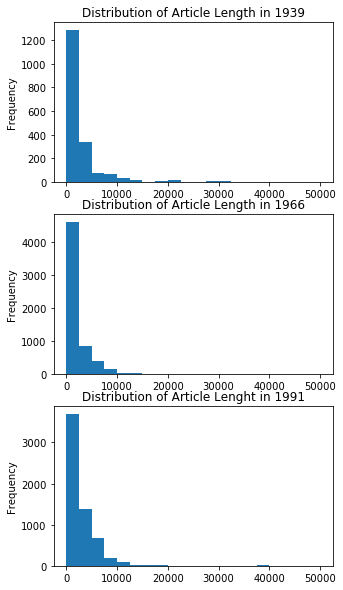

<h3>Further reading/exploration</h3>
Edward Tufte's book 'The visual display of quantitative information'
Also see Bokeh and Seaborn for many more plotting options. 
<ul>
<li>https://seaborn.pydata.org</li>
<li>http://bokeh.pydata.org/en/latest/</li>
</ul>